<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0116_%EA%B0%95%EC%9D%98%EC%A7%84%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

수치형 데이터와 상관분석
===

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [317]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [318]:
import os

os.chdir('/content/drive/MyDrive/새싹2기/데이터분석/data')

In [319]:
titanic = pd.read_csv('titanic.csv')

In [320]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [321]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [322]:
titanic.select_dtypes(exclude='object')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,22.0,1,0,7.2500,True,False
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,3,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True
887,1,1,19.0,0,0,30.0000,False,True
888,0,3,NaN,1,2,23.4500,False,False
889,1,1,26.0,0,0,30.0000,True,True


### (1) 상관계수 확인하기

In [323]:
# step1: 숫자처럼 계산 가능한 데이터 간 상관계수 확인
# 컬럼 간 상관계수 -> 셀

titanic_corr = titanic.corr(numeric_only=True)
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [324]:
titanic_corr.index

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone'],
      dtype='object')

In [325]:
titanic_corr.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone'],
      dtype='object')

- index = 숫자화하여 계산 가능한 컬럼
- columns = 숫자화하여 계산 가능한 컬럼

=> index와 columns가 같다!

### (2) 시각화로 살펴보기

Text(0.5, 1.0, 'titanic 데이터셋 상관관계 확인')

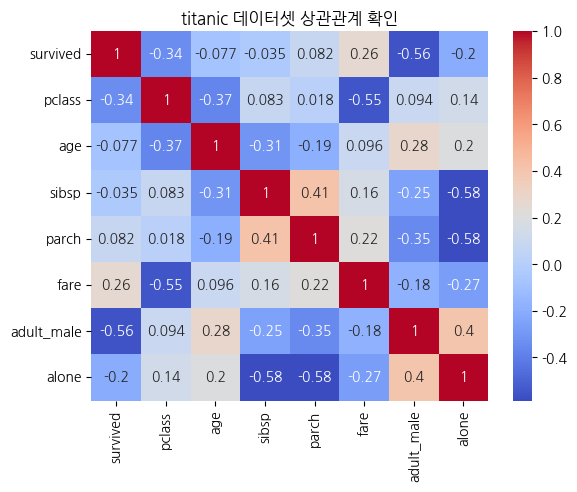

In [326]:
# step2: 시각화
# 히트맵으로 각 셀별 값을 색상으로 나타낼 수 있다.
# -> 요약

ax = sns.heatmap(titanic_corr, annot=True, cmap='coolwarm')
ax.set_title('titanic 데이터셋 상관관계 확인')

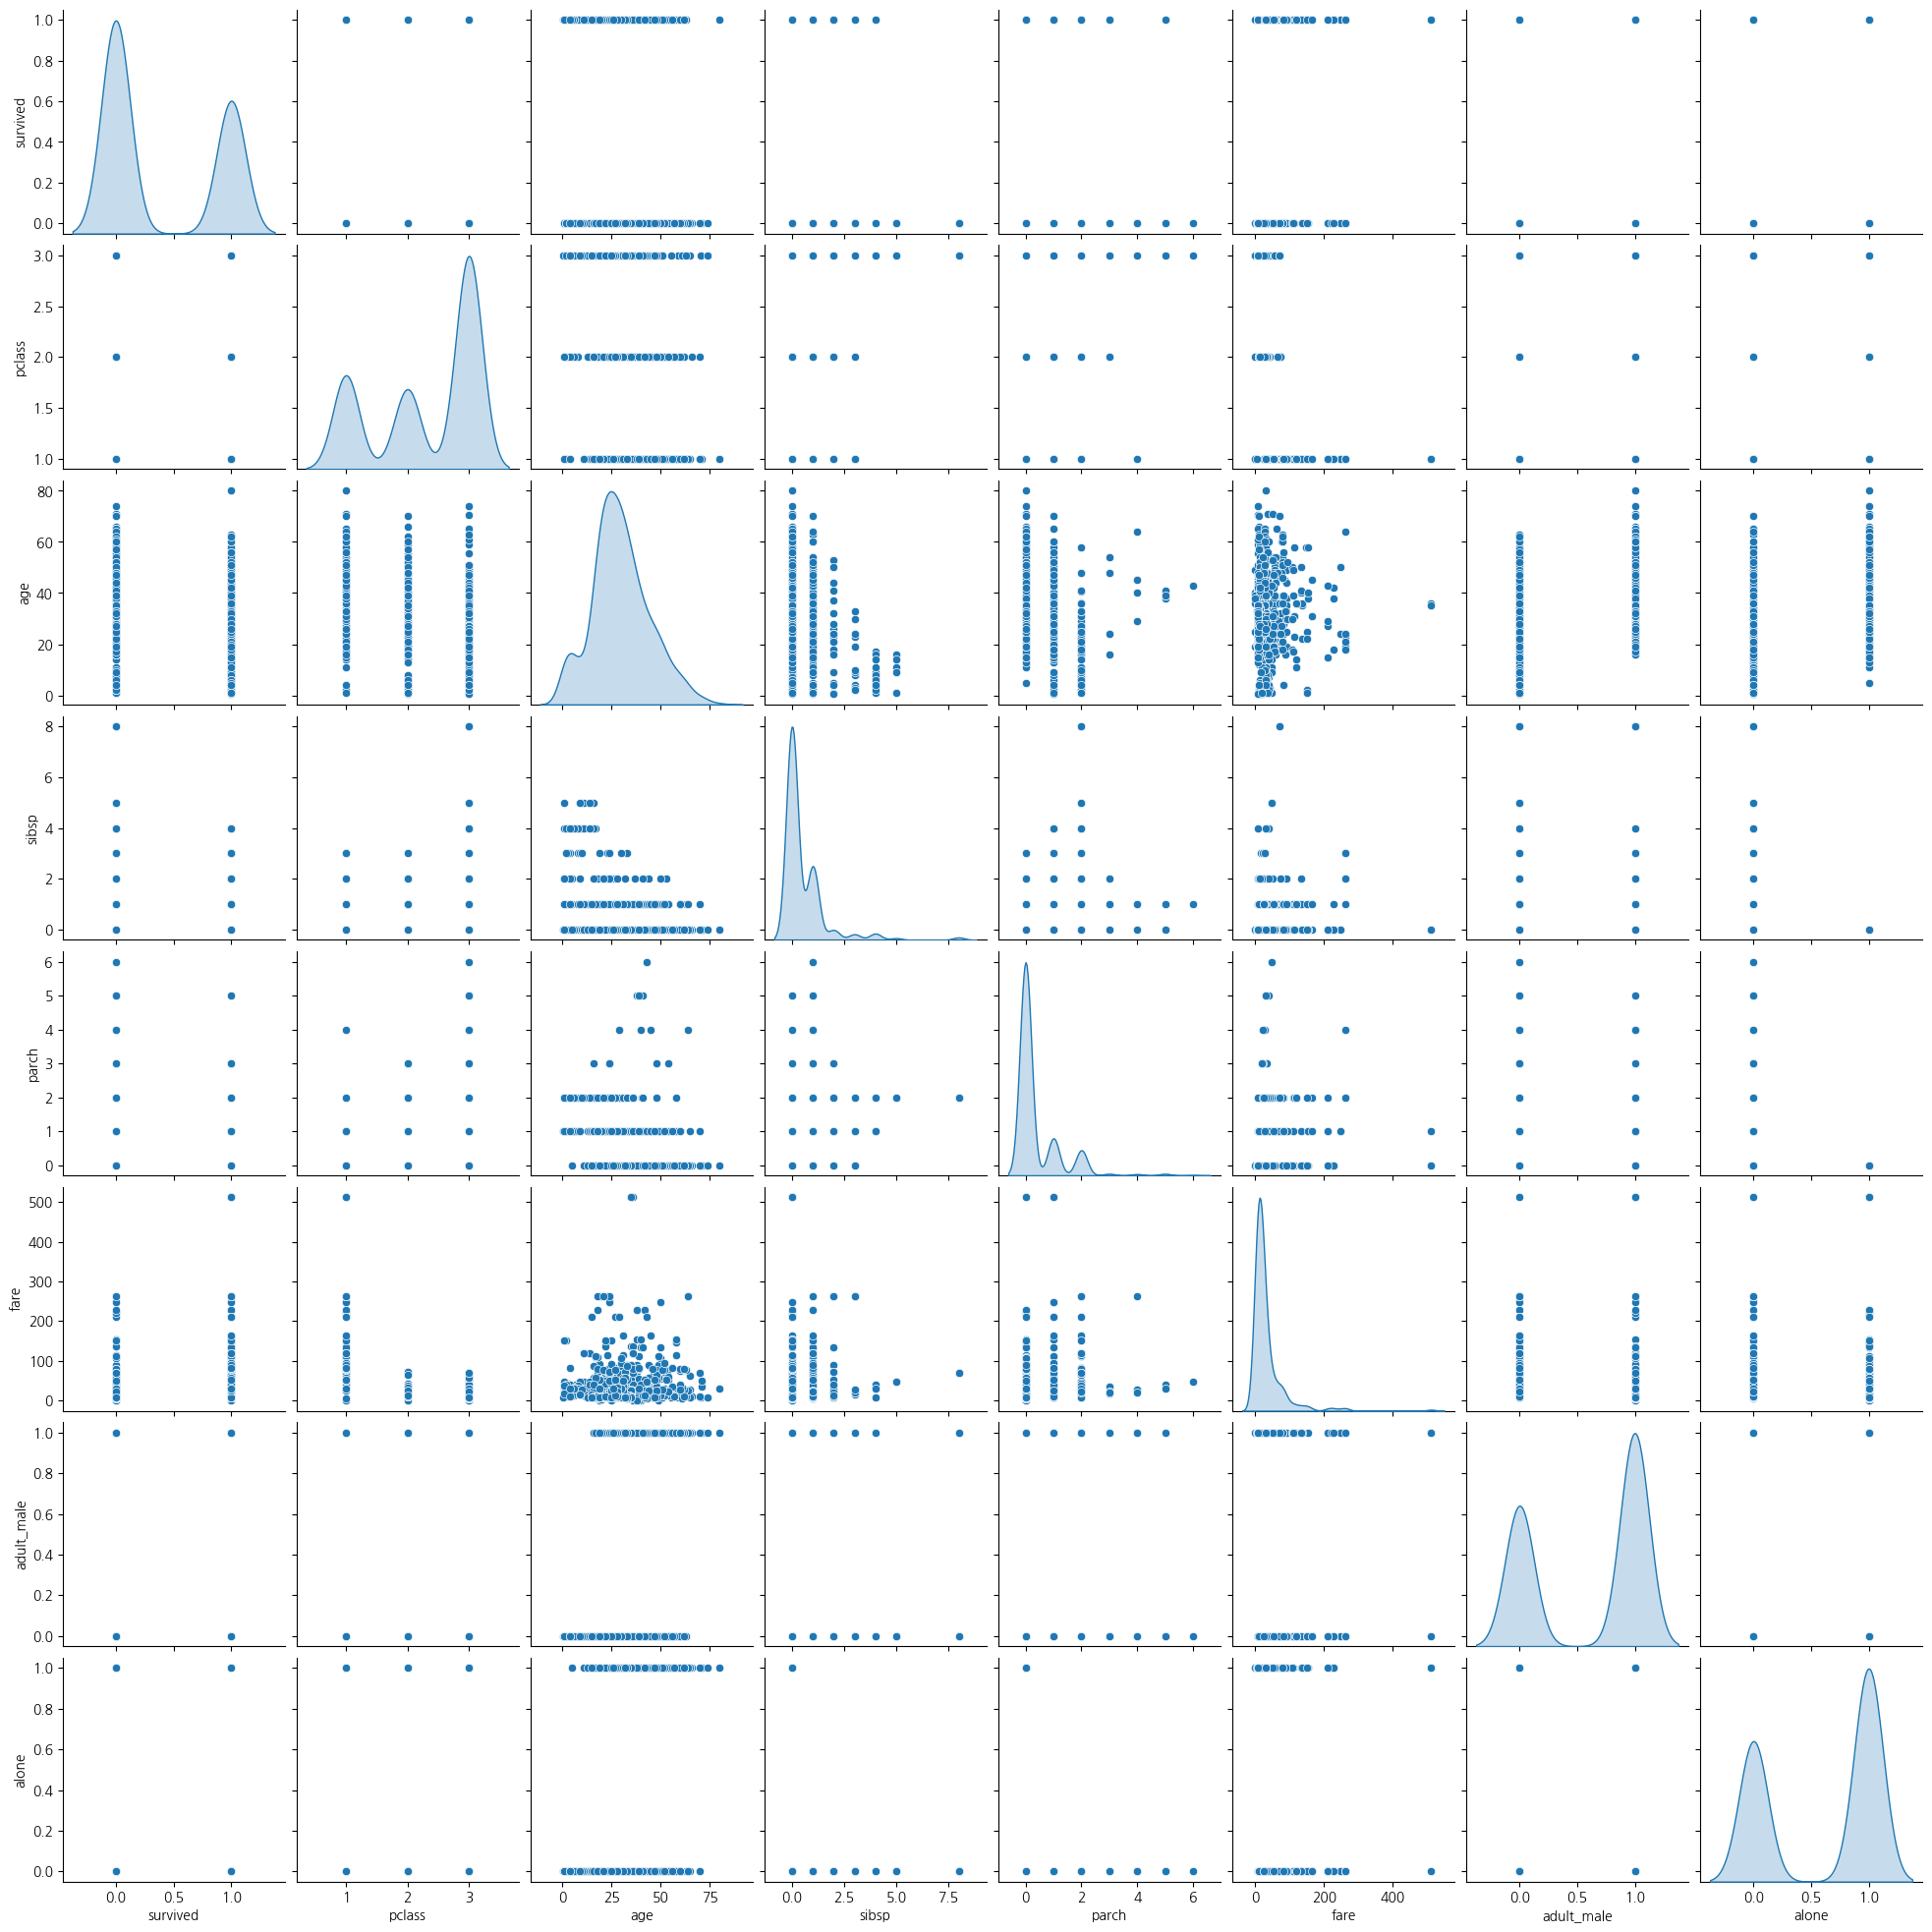

In [327]:
# 계산 가능한 컬럼들을 모두 모아, 변수간 산점도를 보여주는 역할
# 시간 오래걸리고, 이해 못하는 그래프가 포함될 가능성이 높다.
# -> 원하는 컬럼만을 선택하여 그려내는 것이 더 좋습니다.

sns.pairplot(data=titanic, diag_kind='kde')

> 간단 연습

penguin으로 상관분석 연습하기

In [328]:
penguins = sns.load_dataset('penguins')

In [329]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [330]:
penguins.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [331]:
penguins['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


![img](https://media.istockphoto.com/id/2052217052/vector/set-of-cute-penguin-species-in-cartoon-style-on-white-background-penguin-types.jpg?s=612x612&w=0&k=20&c=P9fcBeeaFUeazMYcj4Jz0xtgRUMHcQ5eZh9uoLCCcG4=)

In [332]:
penguins[penguins['species'] == 'Adelie'].corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.391492,0.325785,0.548866
bill_depth_mm,0.391492,1.000000,0.307620,0.576138
flipper_length_mm,0.325785,0.307620,1.000000,0.468202
body_mass_g,0.548866,0.576138,0.468202,1.000000


In [333]:
penguins[penguins['species'] == 'Gentoo'].corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.643384,0.661162,0.669166
bill_depth_mm,0.643384,1.000000,0.706563,0.719085
flipper_length_mm,0.661162,0.706563,1.000000,0.702667
body_mass_g,0.669166,0.719085,0.702667,1.000000


In [334]:
penguins[penguins['species'] == 'Chinstrap'].corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.653536,0.471607,0.513638
bill_depth_mm,0.653536,1.000000,0.580143,0.604498
flipper_length_mm,0.471607,0.580143,1.000000,0.641559
body_mass_g,0.513638,0.604498,0.641559,1.000000


In [335]:
pg = penguins.groupby('species').corr(numeric_only=True)
pg

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                         
Adelie    bill_length_mm           1.000000       0.391492           0.325785   
          bill_depth_mm            0.391492       1.000000           0.307620   
          flipper_length_mm        0.325785       0.307620           1.000000   
          body_mass_g              0.548866       0.576138           0.468202   
Chinstrap bill_length_mm           1.000000       0.653536           0.471607   
          bill_depth_mm            0.653536       1.000000           0.580143   
          flipper_length_mm        0.471607       0.580143           1.000000   
          body_mass_g              0.513638       0.604498           0.641559   
Gentoo    bill_length_mm           1.000000       0.643384           0.661162   
          bill_depth_mm            0.643384       1.000000           0.706563   
          flipper_length_mm        0.661162       0.706563           1.000000   
          body_mass_g              0.669166       0.719085           0.702667   

                             body_mass_g  
species                                   
Adelie    bill_length_mm        0.548866  
          bill_depth_mm         0.576138  
          flipper_length_mm     0.468202  
          body_mass_g           1.000000  
Chinstrap bill_length_mm        0.513638  
          bill_depth_mm         0.604498  
          flipper_length_mm     0.641559  
          body_mass_g           1.000000  
Gentoo    bill_length_mm        0.669166  
          bill_depth_mm         0.719085  
          flipper_length_mm     0.702667  
          body_mass_g           1.000000

<Axes: ylabel='species-None'>

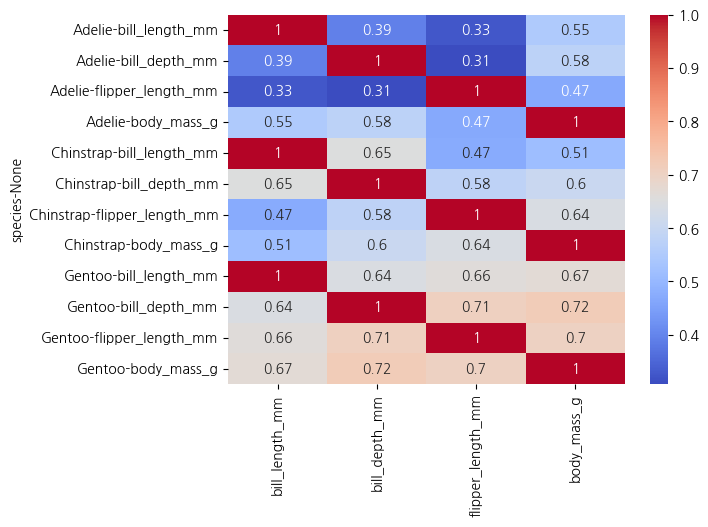

In [336]:
sns.heatmap(pg,annot=True,cmap='coolwarm')

시계열 데이터 분석하기
===

## [1] 날짜와 시간 기초

### (1) datetime

In [337]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2026, 1, 16, 7, 4, 28, 569845)

In [338]:
now.year

2026

In [339]:
now.month

1

In [340]:
now.day

16

In [341]:
now.hour

7

In [342]:
now.second

28

In [343]:
now.weekday()

4

### (2) dateutil

In [344]:
from dateutil.parser import parse

parse("2025-03-27")

datetime.datetime(2025, 3, 27, 0, 0)

In [345]:
parse("2025/03/27")

datetime.datetime(2025, 3, 27, 0, 0)

In [346]:
# 명확하지 않으면, 자의적으로 해석할 수도 있음
parse("25-03-27")

datetime.datetime(2027, 3, 25, 0, 0)

In [347]:
# 해석하지 못하면, 에러 발생
# parse("2025년 03월 27일")

In [348]:
datetime(2025,3,27)

datetime.datetime(2025, 3, 27, 0, 0)

In [349]:
from dateutil import tz

utc_time = datetime.now(tz=tz.tzutc())
utc_time

datetime.datetime(2026, 1, 16, 7, 4, 28, 674027, tzinfo=tzutc())

In [350]:
kst = tz.gettz("Asia/Seoul")
utc_time.astimezone(kst)

datetime.datetime(2026, 1, 16, 16, 4, 28, 674027, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Seoul'))

In [351]:
from dateutil.relativedelta import relativedelta

datetime(2026, 1, 31) + relativedelta(months=1)

datetime.datetime(2026, 2, 28, 0, 0)

In [352]:
end_date = datetime(2026, 3, 27)
now = datetime.now(tz=kst)

In [353]:
end_date

datetime.datetime(2026, 3, 27, 0, 0)

In [354]:
now

datetime.datetime(2026, 1, 16, 16, 4, 28, 696070, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Seoul'))

## [2] pandas로 시간 데이터 다루기

In [355]:
df = pd.DataFrame({
    'user_id': [101, 101, 101, 101, 101, 102, 102, 103, 103],
    'event_time': [
        '2024-02-01 09:10:00',
        '2024-02-01 09:25:00',
        '2024-02-03 21:40:00',
        '2024-02-05 11:00:00',
        '2024-02-07 11:00:00',
        '2024-02-01 10:05:00',
        '2024-02-07 08:50:00',
        '2024-02-05 14:00:00',
        '2024-02-05 14:03:00'
    ],
    'event_type': [
        'login', 'logout', 'purchase','login','purchase',
        'login', 'purchase',
        'login', 'logout'
    ],
    'amount': [0, 0, 12000, 0, 14000, 0, 25000, 0, 0]
})

df

,user_id,event_time,event_type,amount
0,101,2024-02-01 09:10:00,login,0
1,101,2024-02-01 09:25:00,logout,0
2,101,2024-02-03 21:40:00,purchase,12000
3,101,2024-02-05 11:00:00,login,0
4,101,2024-02-07 11:00:00,purchase,14000
5,102,2024-02-01 10:05:00,login,0
6,102,2024-02-07 08:50:00,purchase,25000
7,103,2024-02-05 14:00:00,login,0
8,103,2024-02-05 14:03:00,logout,0


In [356]:
df.dtypes

,0
user_id,int64
event_time,object
event_type,object
amount,int64


### (1) pandas 가 시간데이터 이해하게 만들기

In [357]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [358]:
df.dtypes

,0
user_id,int64
event_time,datetime64[ns]
event_type,object
amount,int64


### (2) dt 접근자

In [359]:
# df['event_time'].hour

In [360]:
df['event_time'].dt.hour

,event_time
0,9
1,9
2,21
3,11
4,11
5,10
6,8
7,14
8,14


In [361]:
df['event_time'].dt.date

,event_time
0,2024-02-01
1,2024-02-01
2,2024-02-03
3,2024-02-05
4,2024-02-07
5,2024-02-01
6,2024-02-07
7,2024-02-05
8,2024-02-05


In [362]:
df['event_time'].dt.weekday

,event_time
0,3
1,3
2,5
3,0
4,2
5,3
6,2
7,0
8,0


In [363]:
df['weekday'] = df['event_time'].dt.weekday

In [364]:
df['weekday'] = df['weekday'].map({0:'Mon',1:'Tue',2:'Wed',
                                   3:'Thur',4:'Fri',5:'Sat',
                                   6:'Sun'})

In [365]:
df['weekday'].head()

,weekday
0,Thur
1,Thur
2,Sat
3,Mon
4,Wed


In [366]:
df['hour'] = df['event_time'].dt.hour

In [367]:
df['hour']

,hour
0,9
1,9
2,21
3,11
4,11
5,10
6,8
7,14
8,14


### (3) 시간데이터 연산

In [368]:
# 가입일
user_df = pd.DataFrame({'user_id':[101,102,103],
                        'signup_date':['2024-01-20','2024-01-10','2024-01-19']})

user_df

,user_id,signup_date
0,101,2024-01-20
1,102,2024-01-10
2,103,2024-01-19


In [369]:
df = df.merge(user_df, how='left', on='user_id')

In [370]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [371]:
df.dtypes

,0
user_id,int64
event_time,datetime64[ns]
event_type,object
amount,int64
weekday,object
hour,int32
signup_date,datetime64[ns]


In [372]:
df['event_time'] - df['signup_date']

,0
0,12 days 09:10:00
1,12 days 09:25:00
2,14 days 21:40:00
3,16 days 11:00:00
4,18 days 11:00:00
5,22 days 10:05:00
6,28 days 08:50:00
7,17 days 14:00:00
8,17 days 14:03:00


In [373]:
user101 = df[df['user_id'] == 101].copy()
user101

,user_id,event_time,event_type,amount,weekday,hour,signup_date
0,101,2024-02-01 09:10:00,login,0,Thur,9,2024-01-20
1,101,2024-02-01 09:25:00,logout,0,Thur,9,2024-01-20
2,101,2024-02-03 21:40:00,purchase,12000,Sat,21,2024-01-20
3,101,2024-02-05 11:00:00,login,0,Mon,11,2024-01-20
4,101,2024-02-07 11:00:00,purchase,14000,Wed,11,2024-01-20


In [374]:
user101['prev_amount'] = user101['amount'].shift(1)

In [375]:
user101

,user_id,event_time,event_type,amount,weekday,hour,signup_date,prev_amount
0,101,2024-02-01 09:10:00,login,0,Thur,9,2024-01-20,NaN
1,101,2024-02-01 09:25:00,logout,0,Thur,9,2024-01-20,0.0
2,101,2024-02-03 21:40:00,purchase,12000,Sat,21,2024-01-20,0.0
3,101,2024-02-05 11:00:00,login,0,Mon,11,2024-01-20,12000.0
4,101,2024-02-07 11:00:00,purchase,14000,Wed,11,2024-01-20,0.0


## [3] 시간을 기준으로 바꾸는 순간

In [376]:
df_time = df.set_index('event_time')

In [377]:
df_time.index

DatetimeIndex(['2024-02-01 09:10:00', '2024-02-01 09:25:00',
               '2024-02-03 21:40:00', '2024-02-05 11:00:00',
               '2024-02-07 11:00:00', '2024-02-01 10:05:00',
               '2024-02-07 08:50:00', '2024-02-05 14:00:00',
               '2024-02-05 14:03:00'],
              dtype='datetime64[ns]', name='event_time', freq=None)

In [378]:
df_time

,user_id,event_type,amount,weekday,hour,signup_date
event_time,,,,,,
2024-02-01 09:10:00,101,login,0,Thur,9,2024-01-20
2024-02-01 09:25:00,101,logout,0,Thur,9,2024-01-20
2024-02-03 21:40:00,101,purchase,12000,Sat,21,2024-01-20
2024-02-05 11:00:00,101,login,0,Mon,11,2024-01-20
2024-02-07 11:00:00,101,purchase,14000,Wed,11,2024-01-20
2024-02-01 10:05:00,102,login,0,Thur,10,2024-01-10
2024-02-07 08:50:00,102,purchase,25000,Wed,8,2024-01-10
2024-02-05 14:00:00,103,login,0,Mon,14,2024-01-19
2024-02-05 14:03:00,103,logout,0,Mon,14,2024-01-19


In [379]:
df_time.index.weekday

Index([3, 3, 5, 0, 2, 3, 2, 0, 0], dtype='int32', name='event_time')

In [380]:
df_time.sort_index()

,user_id,event_type,amount,weekday,hour,signup_date
event_time,,,,,,
2024-02-01 09:10:00,101,login,0,Thur,9,2024-01-20
2024-02-01 09:25:00,101,logout,0,Thur,9,2024-01-20
2024-02-01 10:05:00,102,login,0,Thur,10,2024-01-10
2024-02-03 21:40:00,101,purchase,12000,Sat,21,2024-01-20
2024-02-05 11:00:00,101,login,0,Mon,11,2024-01-20
2024-02-05 14:00:00,103,login,0,Mon,14,2024-01-19
2024-02-05 14:03:00,103,logout,0,Mon,14,2024-01-19
2024-02-07 08:50:00,102,purchase,25000,Wed,8,2024-01-10
2024-02-07 11:00:00,101,purchase,14000,Wed,11,2024-01-20


In [381]:
df_time.resample('h').size()

,0
event_time,
2024-02-01 09:00:00,2
2024-02-01 10:00:00,1
2024-02-01 11:00:00,0
2024-02-01 12:00:00,0
2024-02-01 13:00:00,0
...,...
2024-02-07 07:00:00,0
2024-02-07 08:00:00,1
2024-02-07 09:00:00,0


## [4] 시간 데이터 확인하기

In [382]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [383]:
df.dtypes

,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


In [384]:
# 날짜와 시간을 담고 있는 컬럼의 자료형이 문자열로 되어 있다면, 먼저 변경하라!
pd.to_datetime(df['pickup'])

# 사실은 이걸로도 변환가능하다.
df['pickup'].astype('datetime64[ns]')

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01
3,2019-03-10 01:23:59
4,2019-03-30 13:27:42
...,...
6428,2019-03-31 09:51:53
6429,2019-03-31 17:38:00
6430,2019-03-23 22:55:18
6431,2019-03-04 10:09:25


In [385]:
df = df.set_index('pickup').sort_index()

In [386]:
df.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan


In [387]:
# 인덱스의 자료형 확인
df.index.dtype

dtype('<M8[ns]')

In [388]:
# 오름차순 정렬 확인
df.index.is_monotonic_increasing

True

### (1) 시간 필터링

In [389]:
df.at_time('08:00')

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,


In [390]:
morning = df.between_time('07:00','09:00').copy()
morning.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-03-01 07:00:35,2019-03-01 07:05:11,1,0.86,5.0,1.66,0.0,9.96,yellow,credit card,Sutton Place/Turtle Bay North,Midtown East,Manhattan,Manhattan
2019-03-01 07:06:20,2019-03-01 07:09:34,5,0.66,4.5,1.56,0.0,9.36,yellow,credit card,Lenox Hill West,Upper East Side North,Manhattan,Manhattan
2019-03-01 07:15:56,2019-03-01 07:19:31,1,0.40,4.0,0.00,0.0,7.30,yellow,credit card,Lenox Hill West,Lenox Hill East,Manhattan,Manhattan
2019-03-01 07:16:19,2019-03-01 07:23:47,1,2.00,8.0,2.25,0.0,13.55,yellow,credit card,Gramercy,Midtown South,Manhattan,Manhattan
2019-03-01 07:18:18,2019-03-01 07:30:57,1,2.06,10.0,0.00,0.0,13.30,yellow,cash,Kips Bay,Lenox Hill East,Manhattan,Manhattan


In [391]:
# 해당 시간대에 위치한 데이터만을 필터링
evening = df.between_time('18:00','20:00')
evening.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-03-01 18:02:02,2019-03-01 18:43:57,1,4.89,26.0,0.00,0.0,27.80,yellow,credit card,East Concourse/Concourse Village,Westchester Village/Unionport,Bronx,Bronx
2019-03-01 18:05:51,2019-03-01 18:17:43,3,1.73,9.0,0.00,0.0,10.80,green,cash,Central Harlem,Central Harlem North,Manhattan,Manhattan
2019-03-01 18:07:28,2019-03-01 18:09:22,3,0.22,3.0,0.00,0.0,7.30,yellow,cash,Midtown North,Midtown Center,Manhattan,Manhattan
2019-03-01 18:12:55,2019-03-01 18:26:37,1,1.90,10.5,2.96,0.0,17.76,yellow,credit card,Upper East Side North,Midtown Center,Manhattan,Manhattan
2019-03-01 18:18:50,2019-03-01 18:25:55,2,0.64,6.0,2.06,0.0,12.36,yellow,credit card,Midtown Center,UN/Turtle Bay South,Manhattan,Manhattan


In [392]:
morning['fare'].sum()

np.float64(6721.299999999999)

In [393]:
evening['fare'].sum()

np.float64(10106.71)

In [394]:
# 기간 필터링
df['2019-03-01':'2019-03-10']

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.00,0.00,15.80,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.00,0.00,27.30,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.30,0.00,36.60,yellow,credit card,West Village,Astoria,Manhattan,Queens
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.00,0.00,9.30,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan
2019-03-01 00:30:59,2019-03-01 00:37:39,2,1.35,7.0,0.00,0.00,8.30,green,cash,Astoria,Queensbridge/Ravenswood,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-10 23:32:24,2019-03-10 23:47:17,2,3.30,13.5,0.00,0.00,17.30,yellow,cash,Chinatown,Penn Station/Madison Sq West,Manhattan,Manhattan
2019-03-10 23:34:24,2019-03-10 23:42:04,2,1.66,8.0,2.79,0.00,12.09,yellow,credit card,Central Harlem,East Harlem South,Manhattan,Manhattan
2019-03-10 23:35:03,2019-03-10 23:46:14,1,3.16,12.0,3.00,0.00,18.80,yellow,credit card,Upper East Side South,Greenwich Village North,Manhattan,Manhattan


In [395]:
df['2019-03-01':'2019-03-10'].between_time('18:00','20:00')

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-03-01 18:02:02,2019-03-01 18:43:57,1,4.89,26.0,0.00,0.00,27.80,yellow,credit card,East Concourse/Concourse Village,Westchester Village/Unionport,Bronx,Bronx
2019-03-01 18:05:51,2019-03-01 18:17:43,3,1.73,9.0,0.00,0.00,10.80,green,cash,Central Harlem,Central Harlem North,Manhattan,Manhattan
2019-03-01 18:07:28,2019-03-01 18:09:22,3,0.22,3.0,0.00,0.00,7.30,yellow,cash,Midtown North,Midtown Center,Manhattan,Manhattan
2019-03-01 18:12:55,2019-03-01 18:26:37,1,1.90,10.5,2.96,0.00,17.76,yellow,credit card,Upper East Side North,Midtown Center,Manhattan,Manhattan
2019-03-01 18:18:50,2019-03-01 18:25:55,2,0.64,6.0,2.06,0.00,12.36,yellow,credit card,Midtown Center,UN/Turtle Bay South,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-10 18:37:52,2019-03-10 18:58:09,1,4.00,16.5,4.15,0.00,24.95,yellow,credit card,Union Sq,Upper West Side North,Manhattan,Manhattan
2019-03-10 18:54:29,2019-03-10 19:05:40,1,1.62,8.5,1.00,0.00,12.80,yellow,credit card,Penn Station/Madison Sq West,Greenwich Village North,Manhattan,Manhattan
2019-03-10 19:25:47,2019-03-10 19:57:45,1,9.98,33.0,0.00,0.00,33.80,yellow,cash,JFK Airport,East New York,Queens,Brooklyn


### (2) 시간 통계 메서드

- `cumsum`
- `cummax`
- `cummin`

In [396]:
morning['fare_cumsum'] = morning['fare'].cumsum()

In [397]:
morning[['fare','fare_cumsum']].head()

,fare,fare_cumsum
pickup,,
2019-03-01 07:00:35,5.0,5.0
2019-03-01 07:06:20,4.5,9.5
2019-03-01 07:15:56,4.0,13.5
2019-03-01 07:16:19,8.0,21.5
2019-03-01 07:18:18,10.0,31.5


In [398]:
# 시간데이터가 아닌 데이터 프레임에 대해 적용

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [399]:
tips['tip'].cumsum() # 의미를 찾을 수 없음

,tip
0,1.01
1,2.67
2,6.17
3,9.48
4,13.09
...,...
239,722.83
240,724.83
241,726.83
242,728.58


In [400]:
morning['fare_cummax'] = morning['fare'].cummax()

In [401]:
morning[['fare','fare_cumsum','fare_cummax']].head()

,fare,fare_cumsum,fare_cummax
pickup,,,
2019-03-01 07:00:35,5.0,5.0,5.0
2019-03-01 07:06:20,4.5,9.5,5.0
2019-03-01 07:15:56,4.0,13.5,5.0
2019-03-01 07:16:19,8.0,21.5,8.0
2019-03-01 07:18:18,10.0,31.5,10.0


In [402]:
morning['fare_cummin'] = morning['fare'].cummin()
morning[['fare','fare_cumsum','fare_cummax','fare_cummin']].head()

,fare,fare_cumsum,fare_cummax,fare_cummin
pickup,,,,
2019-03-01 07:00:35,5.0,5.0,5.0,5.0
2019-03-01 07:06:20,4.5,9.5,5.0,4.5
2019-03-01 07:15:56,4.0,13.5,5.0,4.0
2019-03-01 07:16:19,8.0,21.5,8.0,4.0
2019-03-01 07:18:18,10.0,31.5,10.0,4.0


In [403]:
# 누적평균 구하기
morning['fare_cumave'] = (morning['fare'].cumsum() / range(1, len(morning) + 1))

In [404]:
morning[['fare','fare_cumsum','fare_cummax','fare_cumave']].head()

,fare,fare_cumsum,fare_cummax,fare_cumave
pickup,,,,
2019-03-01 07:00:35,5.0,5.0,5.0,5.000
2019-03-01 07:06:20,4.5,9.5,5.0,4.750
2019-03-01 07:15:56,4.0,13.5,5.0,4.500
2019-03-01 07:16:19,8.0,21.5,8.0,5.375
2019-03-01 07:18:18,10.0,31.5,10.0,6.300


<Axes: xlabel='pickup', ylabel='fare_cumave'>

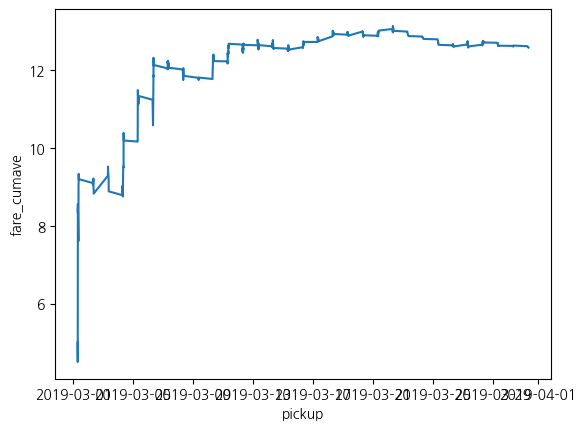

In [405]:
sns.lineplot(data=morning,x=morning.index,y='fare_cumave')

In [406]:
morning['fare'].mean()

np.float64(12.586704119850186)

In [407]:
morning['fare'].describe()

,fare
count,534.000000
mean,12.586704
std,10.779767
min,2.500000
25%,6.000000
50%,9.000000
75%,14.375000
max,81.860000


In [408]:
morning.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,fare_cumsum,fare_cummax,fare_cummin,fare_cumave
pickup,,,,,,,,,,,,,,,,,
2019-03-01 07:00:35,2019-03-01 07:05:11,1,0.86,5.0,1.66,0.0,9.96,yellow,credit card,Sutton Place/Turtle Bay North,Midtown East,Manhattan,Manhattan,5.0,5.0,5.0,5.000
2019-03-01 07:06:20,2019-03-01 07:09:34,5,0.66,4.5,1.56,0.0,9.36,yellow,credit card,Lenox Hill West,Upper East Side North,Manhattan,Manhattan,9.5,5.0,4.5,4.750
2019-03-01 07:15:56,2019-03-01 07:19:31,1,0.40,4.0,0.00,0.0,7.30,yellow,credit card,Lenox Hill West,Lenox Hill East,Manhattan,Manhattan,13.5,5.0,4.0,4.500
2019-03-01 07:16:19,2019-03-01 07:23:47,1,2.00,8.0,2.25,0.0,13.55,yellow,credit card,Gramercy,Midtown South,Manhattan,Manhattan,21.5,8.0,4.0,5.375
2019-03-01 07:18:18,2019-03-01 07:30:57,1,2.06,10.0,0.00,0.0,13.30,yellow,cash,Kips Bay,Lenox Hill East,Manhattan,Manhattan,31.5,10.0,4.0,6.300


In [409]:
morning.dtypes

,0
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object
pickup_zone,object


## [5] 시간 데이터 전처리

In [410]:
df.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan


### (1) 결측치 확인

In [411]:
# 행 중복 확인
df.duplicated().sum()

np.int64(0)

In [412]:
# 결측치 확인
df.isnull().sum()

,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44
pickup_zone,26


In [413]:
# 강제로 fare 열의 결측 발생
import numpy as np

df.iloc[0,3] = np.nan
df.iloc[4,3] = np.nan

In [414]:
df.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,NaN,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,NaN,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan


### (2) 앞 뒤 값 대체 : ffill / bfill

In [415]:
df['fare'].ffill()

# 0번째 위치한 결측은 채워지지 못함 (그 앞에 값이 없기 때문에)
# 4번째 위치한 결측은 3번째 값으로 채워짐

,fare
pickup,
2019-02-28 23:29:03,NaN
2019-03-01 00:03:29,10.0
2019-03-01 00:08:32,22.5
2019-03-01 00:15:53,25.5
2019-03-01 00:29:22,25.5
...,...
2019-03-31 22:13:37,7.5
2019-03-31 22:32:27,3.5
2019-03-31 22:51:53,4.5


In [416]:
df['fare'].bfill()

# 0번째 위치한 결측은 1번째 위치한 값으로 채워짐
# 4번째 위치한 결측은 5번째 위치한 값으로 채워짐

,fare
pickup,
2019-02-28 23:29:03,10.0
2019-03-01 00:03:29,10.0
2019-03-01 00:08:32,22.5
2019-03-01 00:15:53,25.5
2019-03-01 00:29:22,7.0
...,...
2019-03-31 22:13:37,7.5
2019-03-31 22:32:27,3.5
2019-03-31 22:51:53,4.5


### (3) 결측치 보간 : interpolate

- 선형보간 : method="linear"
- 시간보간 : method="time"


In [417]:
df['fare'].interpolate(method='linear')

,fare
pickup,
2019-02-28 23:29:03,NaN
2019-03-01 00:03:29,10.00
2019-03-01 00:08:32,22.50
2019-03-01 00:15:53,25.50
2019-03-01 00:29:22,16.25
...,...
2019-03-31 22:13:37,7.50
2019-03-31 22:32:27,3.50
2019-03-31 22:51:53,4.50


In [418]:
(df.iloc[3,3] + df.iloc[5,3]) / 2

np.float64(16.25)

In [419]:
df['fare'].interpolate(method='time')

,fare
pickup,
2019-02-28 23:29:03,NaN
2019-03-01 00:03:29,10.000000
2019-03-01 00:08:32,22.500000
2019-03-01 00:15:53,25.500000
2019-03-01 00:29:22,8.980684
...,...
2019-03-31 22:13:37,7.500000
2019-03-31 22:32:27,3.500000
2019-03-31 22:51:53,4.500000


In [420]:
df.iloc[3:6, 3]

,fare
pickup,
2019-03-01 00:15:53,25.5
2019-03-01 00:29:22,NaN
2019-03-01 00:30:59,7.0


# [6] 시간 데이터 요약하기

In [421]:
df.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,NaN,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,NaN,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan


In [422]:
df.index.is_monotonic_increasing

True

### (1) resample

> 시간 단위를 바꾸는 요약

In [424]:
df.resample('D').size()

# 'D' : 일별

,0
pickup,
2019-02-28,1
2019-03-01,241
2019-03-02,198
2019-03-03,169
2019-03-04,171
2019-03-05,228
2019-03-06,257
2019-03-07,218
2019-03-08,235


In [425]:
df.resample('W').size()

,0
pickup,
2019-03-03,609
2019-03-10,1498
2019-03-17,1530
2019-03-24,1415
2019-03-31,1381


In [429]:
parse('2019-03-03').weekday()

6

In [441]:
df.resample(rule='W-MON').size()

,0
pickup,
2019-03-04,780
2019-03-11,1536
2019-03-18,1494
2019-03-25,1397
2019-04-01,1226


### (2) rolling

> 시간 흐름을 유지한 채 이동평균 등 통계

In [458]:
daily_fare = df.resample('D')['fare'].sum()
daily_fare.head()

,fare
pickup,
2019-02-28,0.00
2019-03-01,2942.47
2019-03-02,2358.00
2019-03-03,2187.89
2019-03-04,2335.74


In [453]:
daily_fare.rolling(window=7).mean()

,fare
pickup,
2019-02-28,NaN
2019-03-01,NaN
2019-03-02,NaN
2019-03-03,NaN
2019-03-04,NaN
2019-03-05,NaN
2019-03-06,2318.824286
2019-03-07,2732.915714
2019-03-08,2765.205714


In [459]:
daily_fare = daily_fare.to_frame()

In [460]:
daily_fare['fare_7d_avg'] = daily_fare.rolling(window=7).mean()

In [462]:
daily_fare.head(10)

,fare,fare_7d_avg
pickup,,
2019-02-28,0.00,NaN
2019-03-01,2942.47,NaN
2019-03-02,2358.00,NaN
2019-03-03,2187.89,NaN
2019-03-04,2335.74,NaN
2019-03-05,3137.97,NaN
2019-03-06,3269.70,2318.824286
2019-03-07,2898.64,2732.915714
2019-03-08,3168.50,2765.205714


In [464]:
daily_fare['fare_3d_avg'] = daily_fare['fare'].rolling(window=3, min_periods=1).mean()

In [465]:
daily_fare.head(10)

,fare,fare_7d_avg,fare_3d_avg
pickup,,,
2019-02-28,0.00,NaN,0.000000
2019-03-01,2942.47,NaN,1471.235000
2019-03-02,2358.00,NaN,1766.823333
2019-03-03,2187.89,NaN,2496.120000
2019-03-04,2335.74,NaN,2293.876667
2019-03-05,3137.97,NaN,2553.866667
2019-03-06,3269.70,2318.824286,2914.470000
2019-03-07,2898.64,2732.915714,3102.103333
2019-03-08,3168.50,2765.205714,3112.280000
